In [74]:
# Import packages
import plotnine as p9
import numpy as np
import statistics
from scipy import stats
from scipy.stats import chi2_contingency
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels as sm
import seaborn as sns
from sklearn import linear_model
#from smf import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#%matlpotlib inline

In [75]:
#import the file
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [76]:
#print first 100 records
df.head(100)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,W877056,728fccac-151c-4743-8c4a-ebf5af17ec9d,2d0a8b770314914a21b0714fefb68925,Dallas,TX,Dallas,75212,32.78137,-96.87917,...,245.145743,1158.913690,5,5,4,5,1,5,5,4
96,97,M478246,fb749668-dbf8-448a-bc59-5bdba08f7e0b,e04663ac6cc68fac084cd2b394ca7cb8,Claytonville,IL,Iroquois,60926,40.57234,-87.80962,...,124.978080,529.407330,4,4,4,3,2,4,3,4
97,98,N417817,832e769e-3b90-47cc-8f70-12e77fbd52a2,4886325be93630732220fb84b427c7cd,Beaverville,IL,Iroquois,60912,40.97003,-87.59935,...,187.484705,1956.733700,3,2,2,4,3,2,3,2
98,99,R180138,7def992e-acd6-4b3e-9d01-68812f5fd2ff,9f2b4718c758e51e0b16b99cc7915687,Fayetteville,NC,Cumberland,28301,35.07431,-78.88358,...,162.500692,2056.386979,5,4,4,3,4,4,5,5


In [77]:
#check for columns with missing values
missingvalues = df.isna().sum()
#print the summary of columns with missing values
print(missingvalues)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [78]:
#drop columns irrelevant to analysis
NewDf = df.drop(columns=['Churn','Gender','Marital','Job','CaseOrder', 'Customer_id', 'Interaction','UID','City','State','County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone','Techie','Tablet',
                         'TechSupport','Contract', 'PaperlessBilling', 'PaymentMethod','Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6','InternetService', 'Item7', 'Item8','Children',
                         'Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year'])

In [79]:
#check new dataset
NewDf.head()

,Port_modem,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Tenure
0,Yes,Yes,No,Yes,Yes,No,No,Yes,6.795513
1,No,Yes,Yes,Yes,No,No,Yes,Yes,1.156681
2,Yes,Yes,Yes,No,No,No,No,Yes,15.754144
3,No,Yes,No,Yes,No,No,Yes,No,17.087227
4,Yes,No,No,No,No,No,Yes,No,1.670972


In [80]:
#check the datatypes of each columns
NewDf.dtypes

Port_modem           object
Phone                object
Multiple             object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
StreamingTV          object
StreamingMovies      object
Tenure              float64
dtype: object

In [81]:
#create dummies for certain variables
NewDf['PortModem_d'] = [1 if v == 'Yes' else 0 for v in NewDf['Port_modem']]
NewDf['Phone_d'] = [1 if v == 'Yes' else 0 for v in NewDf['Phone']]
NewDf['Multiple_d'] = [1 if v == 'Yes' else 0 for v in NewDf['Multiple']]
NewDf['OnlineSecurity_d'] = [1 if v == 'Yes' else 0 for v in NewDf['OnlineSecurity']]
NewDf['OnlineBackup_d'] = [1 if v == 'Yes' else 0 for v in NewDf['OnlineBackup']]
NewDf['DeviceProtection_d'] = [1 if v == 'Yes' else 0 for v in NewDf['DeviceProtection']]
NewDf['StreamingTV_d'] = [1 if v == 'Yes' else 0 for v in NewDf['StreamingTV']]
NewDf['StreamingMovies_d'] = [1 if v == 'Yes' else 0 for v in NewDf['StreamingMovies']]

In [82]:
NewDf = NewDf.drop(columns=['Port_modem','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'])
NewDf.head()

,Tenure,PortModem_d,Phone_d,Multiple_d,OnlineSecurity_d,OnlineBackup_d,DeviceProtection_d,StreamingTV_d,StreamingMovies_d
0,6.795513,1,1,0,1,1,0,0,1
1,1.156681,0,1,1,1,0,0,1,1
2,15.754144,1,1,1,0,0,0,0,1
3,17.087227,0,1,0,1,0,0,1,0
4,1.670972,1,0,0,0,0,0,1,0


In [83]:
#retrieve descriptive statistics
NewDf.describe()

,Tenure,PortModem_d,Phone_d,Multiple_d,OnlineSecurity_d,OnlineBackup_d,DeviceProtection_d,StreamingTV_d,StreamingMovies_d
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.526188,0.483400,0.906700,0.460800,0.357600,0.450600,0.438600,0.492900,0.489000
std,26.443063,0.499749,0.290867,0.498486,0.479317,0.497579,0.496241,0.499975,0.499904
min,1.000259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.917694,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.430507,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.479795,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,71.999280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
NewDf.to_csv ('NewDf_T2.csv', index = False, header=True)
print(NewDf)

         Tenure  PortModem_d  Phone_d  Multiple_d  OnlineSecurity_d  \
0      6.795513            1        1           0                 1   
1      1.156681            0        1           1                 1   
2     15.754144            1        1           1                 0   
3     17.087227            0        1           0                 1   
4      1.670972            1        0           0                 0   
...         ...          ...      ...         ...               ...   
9995  68.197130            1        1           1                 0   
9996  61.040370            0        1           1                 1   
9997  47.416890            0        1           1                 1   
9998  71.095600            0        0           1                 0   
9999  63.350860            1        1           1                 1   

      OnlineBackup_d  DeviceProtection_d  StreamingTV_d  StreamingMovies_d  
0                  1                   0              0               

In [ ]:
#Set seed for reproducibility
SEED = 1

#Create train/test split

X = NewDf[['StreamingMovies_d', 'StreamingTV_d', 'DeviceProtection_d', 'OnlineSecurity_d', 'OnlineBackup_d', 'Phone_d','Multiple_d']]
y = NewDf['Tenure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

X_train.to_csv ('X_Train.csv', index = False, header=True)
y_train.to_csv ('y_Train.csv', index = False, header=True)
X_test.to_csv ('X_Test.csv', index = False, header=True)
y_test.to_csv ('y_Test.csv', index = False, header=True)




In [85]:
#insantiate the random forests regressor model to 100 estimators

rf = RandomForestRegressor(n_estimators=100, random_state=SEED)
#train the model using the training sets
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

#print y pred
print(y_pred)
print('The average of predictions: {:.2f}'.format(np.mean(y_pred)))


[36.29810818 34.89198221 35.68112416 ... 34.89198221 40.11863697
 34.41674162]
The average of predictions: 34.64


In [69]:


#evaluate and print the mean squared error
print('Mean Squared Error of RF:', metrics.mean_squared_error(y_test, y_pred))

#evaluate the test RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

#print the test set RMSE
print('Rooted Mean Square Error of RF: {:.2f}'.format(rmse_test))


Mean Squared Error of RF: 719.7491188480831
Rooted Mean Square Error of RF: 26.83


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


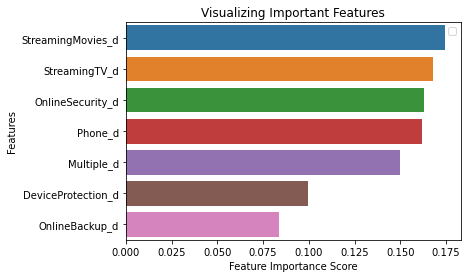

In [70]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [71]:
#retrieve hyperparameters of rf
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [72]:
#define a grid of hyperparameters
params_rf={
    'n_estimators':[100,200,400,600,800],
    'max_depth': [4,6,8],
    'min_samples_leaf': [0.1,0.2],
    'max_features':['log2', 'sqrt']
                    }
#instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1,n_jobs=-1)
#Fit grid_rf to the training set
grid_rf.fit(X_train, y_train)

#Obtain the best hyperparameters from grid_rf
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)
                    

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 100}


In [73]:
#extract the best model from grid_rf
best_model = grid_rf.best_estimator_

#predict the test labels
y_pred= best_model.predict(X_test)

#print y pred
print(y_pred)
print('The average of predictions: {:.2f}'.format(np.mean(y_pred)))

#evaluate the test test RMSE
rmse_test = MSE(y_test, y_pred)** (1//2)

#evaluate and print the mean squared error
print('Mean Squared Error of RF:', metrics.mean_squared_error(y_test, y_pred))

#print the RMSE of test set
print('The RMSE of rf is : {:.2f}'.format(rmse_test))

[35.60213495 35.28748816 35.23686777 ... 35.28748816 34.73249375
 34.72200064]
The average of predictions: 34.60
Mean Squared Error of RF: 705.0384403544076
The RMSE of rf is : 1.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


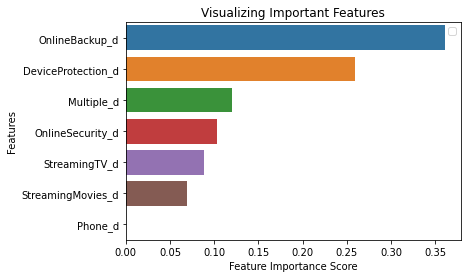

In [86]:
feature_imp = pd.Series(best_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()